## Thera Bank Personal Loan Campaign  



### Data Description:  
The dataset contains data on 5000 customers. The data include customer demographic information(age, income,etc.), the customer's relationship with the bank(mortgage, securities account,  etc.), and the  customer response to the last personal loan campaign(Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.  

### Domain: 
Banking  

### Context:
This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Description of the variables  
· ID: Customer ID  
· Age: Customer’s age in completed years  
· Experience: #years of professional experience    
· Income: Annual income of the customer (thousands of $)   
· Zip Code: Home address ZIP code  
· Family: the Family size of the customer    
· CCAvg: Average credit card spend per month      
· Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional  
· Mortgage: Value of house mortgage if any.  
· Personal Loan: Did this customer accept the personal loan offered in the last campaign?  
· Securities Account: Does the customer have securities account with the bank?  
· CD Account: Does the customer have a certificate of deposit (CD) account with the bank?  
· Online: Do customers use internet banking facilities?  
· Credit card: Does the customer use a credit card issued by UniversalBank?  

## Part I: Library and Data Import, Descriptive Analysis 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
pdata.shape # Check number of columns and rows in data frame

(5000, 14)

In [5]:
pdata.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
pdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
pdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
pdata.isnull().values.any() # If there are any null values in data set

False

In [9]:
pdata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values in this dataset

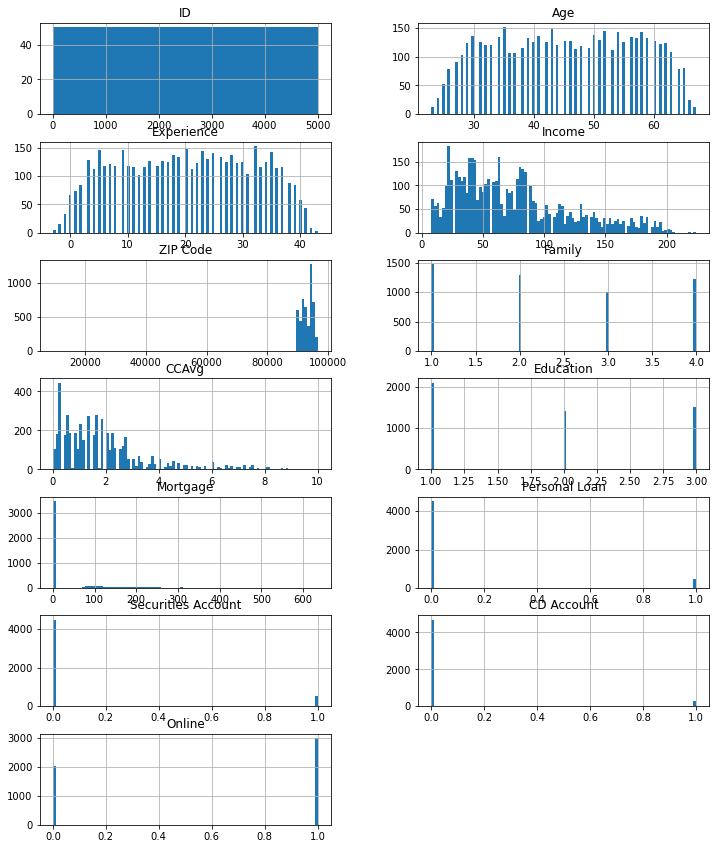

In [10]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

Mortgage distribution is skewed by outliers

In [11]:
pdata.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [12]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(rotation=90, horizontalalignment='right')
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


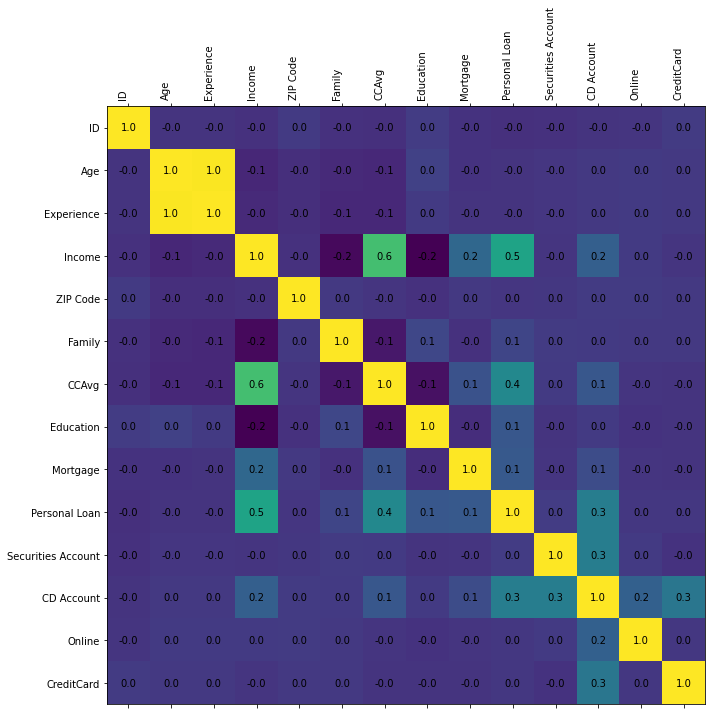

In [13]:
plot_corr(pdata)

Comments: Here we can see there is a a one ot one correlation between age and experience. Also we can notice a good correlation between income, CCAvg and Personal Loan, indicating people with higher income tend to perhaps more. 

## Part II: Exploratory Data Analysis

In [14]:
pdata.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

We do not need for ‘ID’, ‘ZIP_Code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series & ‘Experience’ is highly correlated with ‘Age’.


In [15]:
pdata.drop('ID',axis=1, inplace=True)
pdata.drop('Experience',axis=1, inplace=True)
pdata.drop('ZIP Code',axis=1, inplace=True)

Let's check that ID, Experience and ZIP Code were correctly removed from data frame

In [16]:
pdata.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [17]:
zero_mortgage = pdata.loc[pdata['Mortgage'] == 0]
print('Number of people with zero mortgage is:', zero_mortgage['Mortgage'].count());

Number of people with zero mortgage is: 3462


In [18]:
zero_creditcard = pdata.loc[pdata['CCAvg'] == 0]
print('Number of people with zero credit card spending is:', zero_creditcard['CCAvg'].count());

Number of people with zero credit card spending is: 106


In [19]:
pdata.value_counts()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
38   21      1       0.67   3          0         0              0                   0           1       0             2
66   114     1       0.80   3          0         0              0                   0           1       1             2
29   39      4       2.10   3          0         0              0                   0           1       0             2
39   65      1       1.50   3          0         0              0                   0           0       0             2
40   28      2       0.80   3          0         0              0                   0           0       0             2
                                                                                                                     ..
52   62      1       1.80   3          231       0              0                   0           1       0             1
             4       1.80   3          82    

### Univariate Analysis

In [20]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


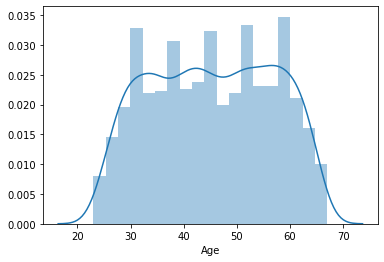

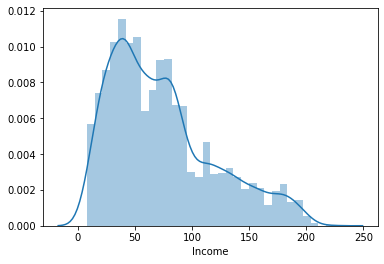

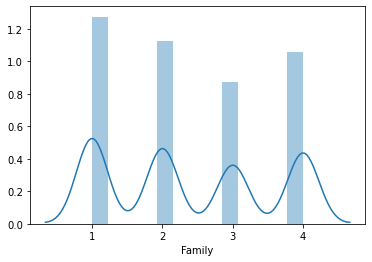

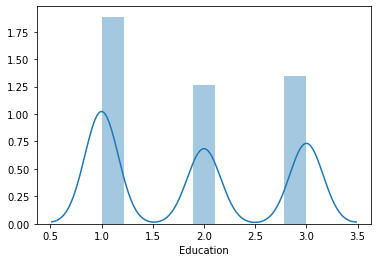

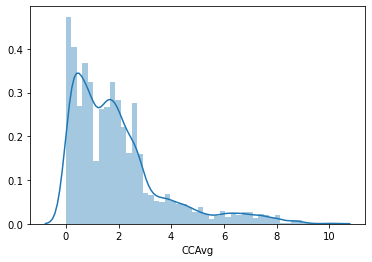

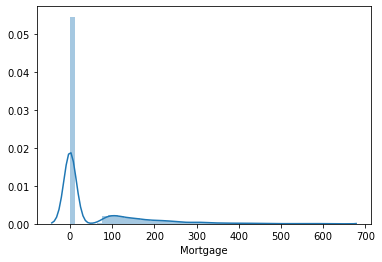

In [21]:
# distplot for continous columns
for i in ['Age','Income','Family','Education','CCAvg','Mortgage']:
    sns.distplot(pdata[i])
    plt.show()

### Another powerful way to conduct univariate analysis is to use pandas profiling

In [22]:
!pip install pandas_profiling
import pandas_profiling
pdata.profile_report()

-Points observed by profile report & univariate analysis:      
-The data set got 0 missing cells.      
-It got 5 numeric variables: ‘Age’, ‘CC_Avg’, ‘Income’, ‘Mortgage’, ‘Experience’    
-It got 2 categorical variables: ‘Education’, ‘Family’  
-It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’  
-Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.  
-Also, Experience is highly correlated with Age (ρ = 0.994214857)  
  
Categorical  
42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.  
Around 29% of the customer’s family size is 1.  
  
Boolean  
94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.  
Around 71% of the customer doesn’t use a credit card issued by UniversalBank.  
Around 60% of customers use internet banking facilities.  
Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.  
Around 90% of the customer doesn’t have a securities account with the bank.  
  
Numeric  
The mean age of the customers is 45 with standard deviation of 11.5. Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical  
  
-The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)  
-The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)  
-The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)  

## Bivariate Analysis

After exploring univariate variables, let's now put each variable in perspective with the target variable, in this case Personal Loan.

#### Categorical Variables

In [23]:
pd.crosstab(pdata['Education'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


People who are more educated have higher probability to buy a personal loan

In [24]:
pd.crosstab(pdata['Family'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


Overall, family size does not affect the probabilty of personal loan. 

#### Boolean Variables

In [25]:
pd.crosstab(pdata['CD Account'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


Customers possessing CD accounts are more likely to buy personnal loans

In [26]:
pd.crosstab(pdata['CreditCard'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


Possession of credit card has little impact on probability of taking personal loan

In [27]:
pd.crosstab(pdata['Online'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


Similarly, whether customers bank online or not has little impact on probaility of taking a personal loan

In [28]:
pd.crosstab(pdata['Securities Account'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


Possession of a security account has little impact on probability of taking a personal loan

#### Numerical Variables

<AxesSubplot:xlabel='Personal Loan'>

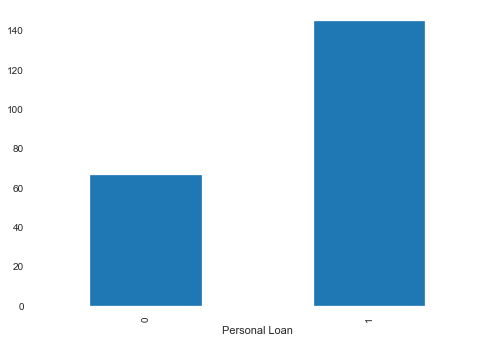

In [29]:
pdata.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

As expressed earlier, customers with larger income are more likely to buy a personal loan

<AxesSubplot:xlabel='Personal Loan'>

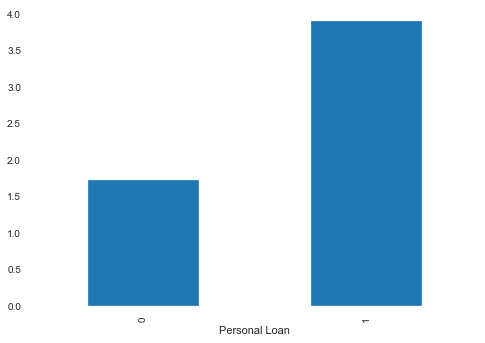

In [30]:
pdata.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

Likewise, customers who have credit cards are more likely to buy personal loans

<AxesSubplot:xlabel='Personal Loan'>

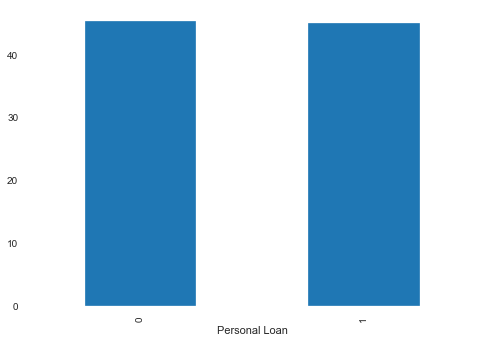

In [31]:
pdata.groupby('Personal Loan')['Age'].mean().plot(kind='bar')

Lastly, age does not determine the likelhood of a customer purchasing a personal loan

#### Box plot Representation

<AxesSubplot:xlabel='Age'>

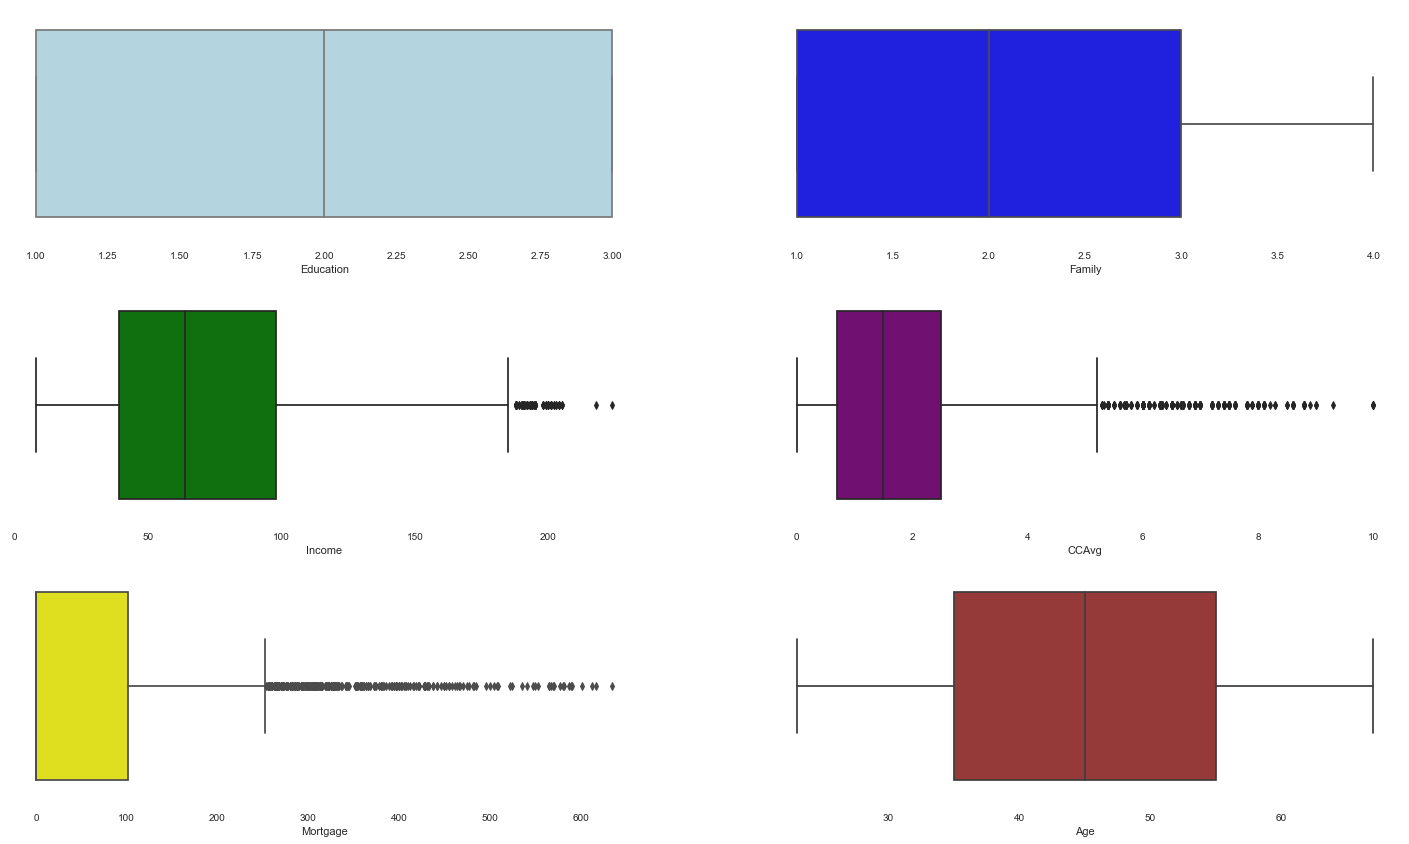

In [32]:
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= pdata.Education, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= pdata.Family, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= pdata.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= pdata.CCAvg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= pdata.Mortgage, color='yellow')

plt.subplot(5,2,6)
sns.boxplot(x= pdata.Age, color='brown')

Notice from the box plot representation how Mortgage, CCAvg and Income are skewed.

### Data Prepapration for model

#### Outliers

As previously observed, Mortgage distribution is skewed to the right, whic can affect the performance of our model. We wil use Z score to remove thoe outliers

In [33]:
from scipy import stats 
pdata['Mortgage_zscore']=np.abs(stats.zscore(pdata['Mortgage']))
pdata=pdata[pdata['Mortgage_zscore']<3]
pdata.drop('Mortgage_zscore', axis=1, inplace=True)

In [34]:
pdata.shape

(4895, 11)

## Part III: Splitting Data into Testing and Training Sets

In [35]:
## Define X and Y variables
X = pdata.drop('Personal Loan', axis=1)
Y = pdata[['Personal Loan']]

In [36]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=100)

In [37]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [38]:
    print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 1]), (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 0]), (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 433 (8.85%)
Original Personal Loan False Values   : 4462 (91.15%)

Training Personal Loan True Values    : 3426 (100.00%)
Training Personal Loan False Values   : 3426 (100.00%)

Test Personal Loan True Values        : 1469 (100.00%)
Test Personal Loan False Values       : 1469 (100.00%)



## Part IV: Model Building Using SciKit Learn

In [39]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=100)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [41]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print("Testing accuracy",logreg.score(X_test, y_test))

Trainig accuracy 0.9483362521891419
Testing accuracy 0.9503063308373043


In [42]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


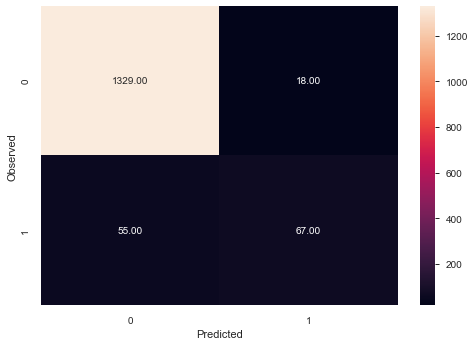

None

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1347
           1       0.79      0.55      0.65       122

    accuracy                           0.95      1469
   macro avg       0.87      0.77      0.81      1469
weighted avg       0.95      0.95      0.95      1469


Roc Auc Score: 0.7679086494578116


In [43]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y_test, y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

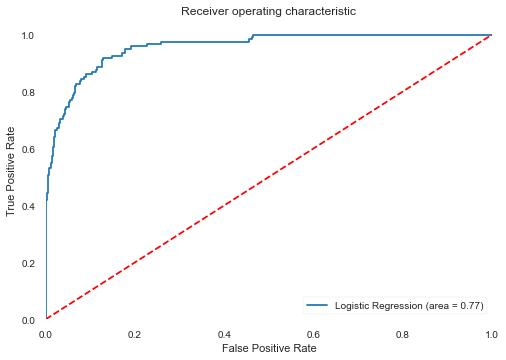

Roc Auc Score: 0.7679086494578116


In [44]:
!pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#### Business Insight
The model precision is 79%. It means it does ok at predicting the probability of a customer actaully buying a personal loan (True positive). However recall is only 55% which means that nearly half the time, it misses capturing the customers that were predicted to be unlikely purchasing a loan but turn out to actually being able to (false negatives). So we clearly need to improve prediction performance from this initial model.  

## Part V: Model Improvement

### Data standardization

Most of our data is unevenly distributed and skewed and the value ranges are different from one feature to the next. I decided to standardize the data distribution to improve model precitions 

In [45]:
from sklearn import preprocessing
col_names=pdata.columns
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [46]:
logreg = LogisticRegression(random_state=100)
logreg.fit(scaled_X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_predict = logreg.predict(scaled_X_test) 

In [48]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print("Testing accuracy",logreg.score(X_test, y_test))

Trainig accuracy 0.09077641564506714
Testing accuracy 0.08304969366916269


In [49]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


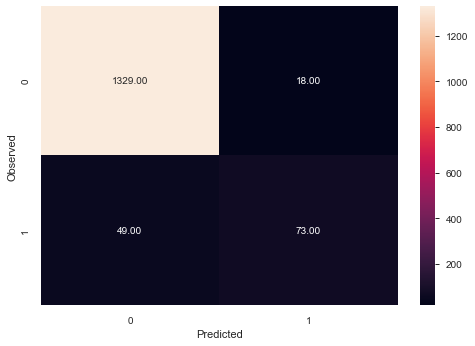

None

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1347
           1       0.80      0.60      0.69       122

    accuracy                           0.95      1469
   macro avg       0.88      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469


Roc Auc Score: 0.7924988133922378


In [50]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y_test, y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

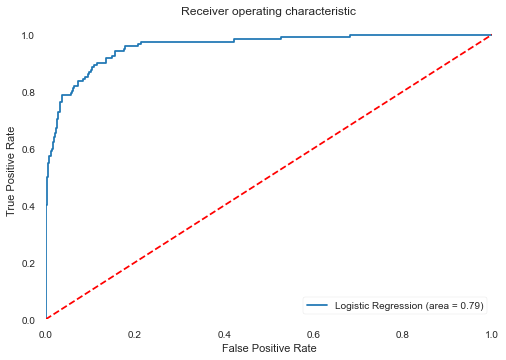

Roc Auc Score: 0.7924988133922378


In [51]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(scaled_X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(scaled_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#### Business Insight

It look like standardizing the data helped improve model metrics, especially on recall with a 5% increase. 

### Changing Model Parameters

In [52]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.1,solver=i)  # changing values of solver
    model.fit(scaled_X_train, y_train) 
    y_predict = model.predict(scaled_X_test)     
    train_score.append(round(model.score(scaled_X_train, y_train),3))
    test_score.append(round(model.score(scaled_X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.952, 0.952, 0.953, 0.952, 0.952]

[0.957, 0.957, 0.954, 0.957, 0.957]


Liblinear seem to be more consistent with least difference between train and test scores. We choose to focus on this particular solver in the next steps of model improvement.

In [54]:
model = LogisticRegression(random_state=100,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(scaled_X_train, y_train) 

y_predict = model.predict(scaled_X_test)     

print("Trainig accuracy",model.score(scaled_X_train,y_train))  
print()
print("Testing accuracy",model.score(scaled_X_test, y_test))

Trainig accuracy 0.8931698774080561

Testing accuracy 0.9012933968686181


In [55]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=100,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(scaled_X_train, y_train) 
    y_predict = model.predict(scaled_X_test)     
    train_score.append(round(model.score(scaled_X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(scaled_X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.869, 0.893, 0.894, 0.893, 0.893, 0.893]

[0.871, 0.9, 0.901, 0.901, 0.901, 0.901]


The most optimal C value seems to be 0.5. We decide to use this value moving for our final model.

Trainig accuracy 0.8934617629889083

Testing accuracy 0.9006126616746086

Confusion Matrix


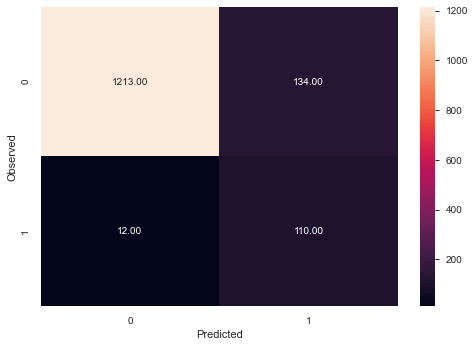

None

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1347
           1       0.45      0.90      0.60       122

    accuracy                           0.90      1469
   macro avg       0.72      0.90      0.77      1469
weighted avg       0.95      0.90      0.91      1469

Roc Auc Score: 0.9010795088052381


In [56]:
#Therefore final model is
model = LogisticRegression(random_state=100,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(scaled_X_train, y_train)
y_predict = model.predict(scaled_X_test)
print("Trainig accuracy",model.score(scaled_X_train,y_train))  
print()
print("Testing accuracy",model.score(scaled_X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

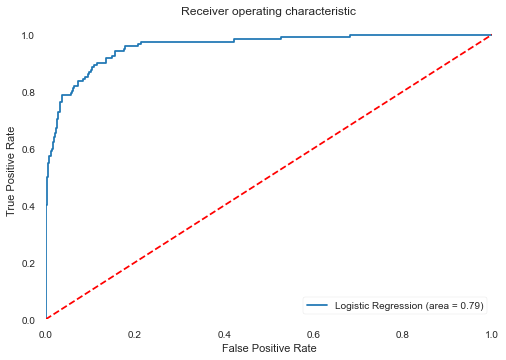

Roc Auc Score: 0.9010795088052381


In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(scaled_X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(scaled_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

After modifying model parameters we now have very recall score forthe model. This means that we have greater certainty at predicting true positives out of the total of true posiives and false negatives. However this comes at a great expense of model precision which is now down to 45%. This might not be the best model perforamnce that we are seeking. We propose the following solutions. 
1)Explore other algorithms (KNN, SVM, Decision Trees). These are yet outside the scope of this level of the course though so we can revisit at a later time.
2)Remove some additional features from the dataset and rerun our model. We will proceed with this approach.

### Removing Additonal Features from Dataset

As dsicussed previously, the Mortgage feature displayed heavy skeweness to the right. We tried reducing its impact by removing some outliers but it seeems that it could still be negatively impacting our model performace. There was also no corrleation between Age and Personal Loans. We could remove these features from the dataframe and see impact on model performance.

In [58]:
pdata.drop('Mortgage',axis=1, inplace=True)
pdata.drop('Age',axis=1, inplace=True)

In [59]:
## Define X and Y variables
X = pdata.drop('Personal Loan', axis=1)
Y = pdata[['Personal Loan']]

In [60]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=100)

In [61]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [62]:
    print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 1]), (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 0]), (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 433 (8.85%)
Original Personal Loan False Values   : 4462 (91.15%)

Training Personal Loan True Values    : 3426 (100.00%)
Training Personal Loan False Values   : 3426 (100.00%)

Test Personal Loan True Values        : 1469 (100.00%)
Test Personal Loan False Values       : 1469 (100.00%)



In [63]:
from sklearn import preprocessing
col_names=pdata.columns
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [64]:
logreg = LogisticRegression(random_state=100)
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test) 
print("Trainig accuracy",logreg.score(scaled_X_train,y_train))  
print("Testing accuracy",logreg.score(scaled_X_test, y_test))

Trainig accuracy 0.9150612959719789
Testing accuracy 0.9237576582709326


In [65]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


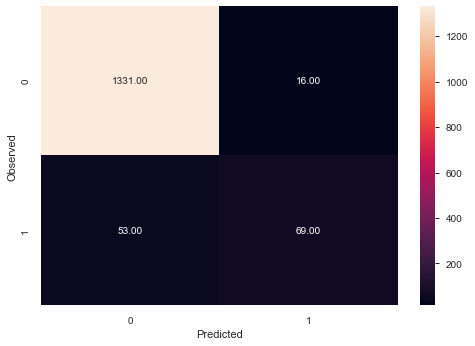

None

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1347
           1       0.81      0.57      0.67       122

    accuracy                           0.95      1469
   macro avg       0.89      0.78      0.82      1469
weighted avg       0.95      0.95      0.95      1469


Roc Auc Score: 0.7768477612666886


In [66]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y_test, y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

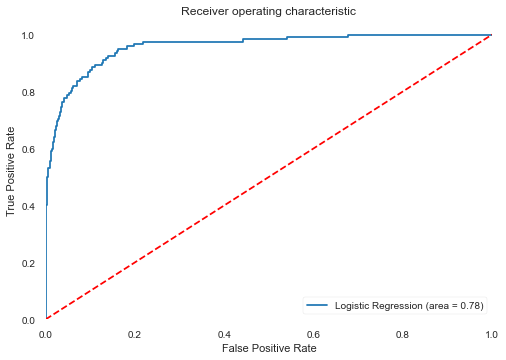

Roc Auc Score: 0.7768477612666886


In [67]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [68]:
model = LogisticRegression(random_state=100,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(scaled_X_train, y_train) 

y_predict = model.predict(scaled_X_test)     

print("Trainig accuracy",model.score(scaled_X_train,y_train))  
print()
print("Testing accuracy",model.score(scaled_X_test, y_test))

Trainig accuracy 0.8937536485697607

Testing accuracy 0.899931926480599


Trainig accuracy 0.8940455341506129

Testing accuracy 0.9006126616746086

Confusion Matrix


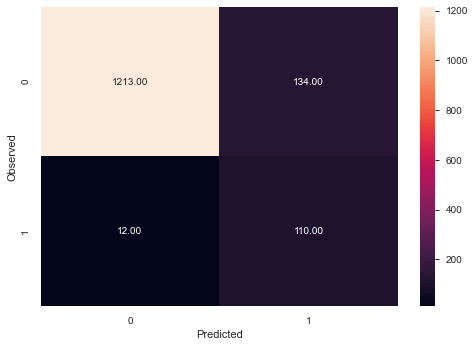

None

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1347
           1       0.45      0.90      0.60       122

    accuracy                           0.90      1469
   macro avg       0.72      0.90      0.77      1469
weighted avg       0.95      0.90      0.91      1469

Roc Auc Score: 0.9010795088052381


In [69]:
model = LogisticRegression(random_state=100,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(scaled_X_train, y_train)
y_predict = model.predict(scaled_X_test)
print("Trainig accuracy",model.score(scaled_X_train,y_train))  
print()
print("Testing accuracy",model.score(scaled_X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

After removing additional features we did not see improvement on the model performance. 

## Part VI: Business Insight

The initial model provided reasonable precision score of 80% but a lower recall score of 60%. We tried to improve the model towards increasing both precision and recall using the logistic regression function and exploring sensitivities to different parameters (i.e hyperparameter tunning). This second model has a much higher recall score of 90%, meaning it does a very good job at predicting true positives (customer actual buying a personal loan) and false negatives (customer predicted to not buy a loan but actually does buy one). So we could say that this model is great for improving on acquiring new personal loan customers, if this is what the company whishes to focus on. But this comes at the expense of the model precision (45%) which means a lot of the customers predicted to buy personal loans but in reality do not (false positives) are wrongly classified more than half the time, and that is an issue. Since in this situation the bank is focused on a marketing campaign to draw as many new customers as possible with a minimal budget, this last model could be an ok fit for purpose appraoch to aggressively try to achieve that. I still recommend using a different algorithm to improve the model performance and metrics. If the bank would prefer a less risky approach, then the first model (80% precision, 60% recall) could be a better fit for that for now.